In [1]:
import numpy as np
from func import *
from scipy.interpolate import interp1d
import os

# 1. 
Derive the critical chi^2 values for which, that one can assign 68.3%, 90%, 95%, 95.4%, 99% and 99.73% confidence limits for degrees of freedom of 1, 2, 3, 4, 5 and 6 of the chi^2 distribution. Make a table for this.  

In [24]:
xarr = np.linspace(0, 20, 1000)
yarr_1 = np.array([Chisq_integral(x, 1, to_inf=False) for x in xarr])
yarr_2 = np.array([Chisq_integral(x, 2, to_inf=False) for x in xarr])
yarr_3 = np.array([Chisq_integral(x, 3, to_inf=False) for x in xarr])
yarr_4 = np.array([Chisq_integral(x, 4, to_inf=False) for x in xarr])
yarr_5 = np.array([Chisq_integral(x, 5, to_inf=False) for x in xarr])
f_dof1 = interp1d(yarr_1, xarr, kind='linear', fill_value="extrapolate")
f_dof2 = interp1d(yarr_2, xarr, kind='linear', fill_value="extrapolate")
f_dof3 = interp1d(yarr_3, xarr, kind='linear', fill_value="extrapolate")
f_dof4 = interp1d(yarr_4, xarr, kind='linear', fill_value="extrapolate")
f_dof5 = interp1d(yarr_5, xarr, kind='linear', fill_value="extrapolate")

/home/john1256/KASI/KASI_Ms/2025/Statistics_1/func.py:41: RuntimeWarning: divide by zero encountered in scalar power
  prob = 2**(-n/2)/gamma(n/2)*chi**(n-2)*np.exp(-chisq/2)
/home/john1256/KASI/KASI_Ms/2025/Statistics_1/func.py:47: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  result, _ = quad(Chisq_pdf, 0, chisq, args = (n,))


In [44]:
import pandas as pd

interval = [0.683, 0.9, 0.95, 0.954, 0.99, 0.9973]
dof = [f_dof1, f_dof2, f_dof3, f_dof4, f_dof5]
dof_str = ['1', '2', '3', '4', '5']
interval_str = ['68.3%', '90%', '95%', '95.4%', '99%', '99.73%']


for i in range(len(dof_str)):
    line = 'DOF : '+dof_str[i] + ' | '
    for j in range(len(interval_str)):
        line += f'{interval_str[j]}: {dof[i](interval[j]):.3f}, '
    print(line)

DOF : 1 | 68.3%: 1.001, 90%: 2.706, 95%: 3.841, 95.4%: 3.982, 99%: 6.635, 99.73%: 9.000, 
DOF : 2 | 68.3%: 2.298, 90%: 4.605, 95%: 5.991, 95.4%: 6.158, 99%: 9.210, 99.73%: 11.829, 
DOF : 3 | 68.3%: 3.529, 90%: 6.251, 95%: 7.815, 95.4%: 8.001, 99%: 11.345, 99.73%: 14.156, 
DOF : 4 | 68.3%: 4.722, 90%: 7.779, 95%: 9.488, 95.4%: 9.689, 99%: 13.277, 99.73%: 16.251, 
DOF : 5 | 68.3%: 5.891, 90%: 9.236, 95%: 11.070, 95.4%: 11.286, 99%: 15.086, 99.73%: 18.205, 


# 2.

In [2]:
data_f = np.loadtxt(os.path.join(os.getcwd(), 'Assignment5', 'regression_data_f.txt'))
data_h = np.loadtxt(os.path.join(os.getcwd(), 'Assignment5', 'regression_data_h.txt'))
data_j = np.loadtxt(os.path.join(os.getcwd(), 'Assignment5', 'regression_data_j.txt'))
data_k = np.loadtxt(os.path.join(os.getcwd(), 'Assignment5', 'regression_data_k.txt'))

In [32]:
def M1(x, parm):
    return parm[0]*x + x**parm[1] + 1
def M2(x, parm):
    return parm[0] * np.tanh(x - parm[1]) + parm[2]
def M3(x, parm):
    return parm[0]*x * (np.sin(x) + parm[1]) + 1
def M4(x, parm):
    return parm[0] + parm[1]*(1 + x)
def M5(x, parm):
    return np.sqrt(parm[0] * (1 + x)**3 + parm[1])

In [ ]:
def M1_test(x, a, b):
    return a*x + x**b + 1
def M2_test(x, a, b, c):
    return a * np.tanh(x - b) + c
def M3_test(x, a, b):
    return a*x * (np.sin(x) + b) + 1
def M4_test(x, a, b):
    return a + b*(1 + x)
def M5_test(x, a, b):
    return np.sqrt(a * (1 + x)**3 + b)

In [6]:
theory = [M1_test, M2_test, M3_test, M4_test, M5_test]
data = [data_f, data_h, data_j, data_k]

from scipy.optimize import curve_fit

for i in range(4):
    x = data[i][:,0]
    y = data[i][:,1]
    sig_y = data[i][:,2]
    best_chi2 = np.inf
    best_params = None
    best_model_idx = -1
    for j in range(5):
        try:
            popt,_ = curve_fit(theory[j], x, y, sigma=sig_y, absolute_sigma=True)
            print(f"data {i}, theory {j}, params: {popt}")
        except Exception as e:
            print(f"Model {j+1} fitting failed for dataset {i+1}: {e}")
            continue

data 0, theory 0, params: [0.21301676 0.95481067]
data 0, theory 1, params: [2.06581126 2.5797237  3.96835438]
data 0, theory 2, params: [6.41781718e-03 1.80697817e+02]
data 0, theory 3, params: [-0.09660282  1.14302049]
data 0, theory 4, params: [-0.49986258 -0.49986472]
data 1, theory 0, params: [-0.2120937   1.32226212]
data 1, theory 1, params: [2.83640909 2.91533316 4.55279974]
Model 3 fitting failed for dataset 2: Optimal parameters not found: Number of calls to function has reached maxfev = 600.
data 1, theory 3, params: [-1.20302324  1.51312603]
data 1, theory 4, params: [-0.49966021 -0.49968789]
data 2, theory 0, params: [-0.36184639  1.08433695]
data 2, theory 1, params: [1.74062406 2.05690462 2.47743546]
data 2, theory 2, params: [9.39933246e-03 8.05210607e+01]
data 2, theory 3, params: [-0.2810498   0.87414321]
data 2, theory 4, params: [-0.49998805 -0.49998808]
data 3, theory 0, params: [0.68405783 0.22850023]
data 3, theory 1, params: [2.57425176 0.68847942 2.36511138]
da

/tmp/ipykernel_87680/2993705082.py:10: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(a + (1 + x)**3 + b)
/tmp/ipykernel_87680/2993705082.py:2: RuntimeWarning: divide by zero encountered in power
  return a*x + x**b + 1


# 3.

In [4]:
read_model_result("best_fit_2.txt", "Model5")

(array([0.32256562, 0.65348533]), 113.2115315957673)

New parameters: [0.3227979442945882, 0.634791010638383]
Min chi2: 113.07575485506003


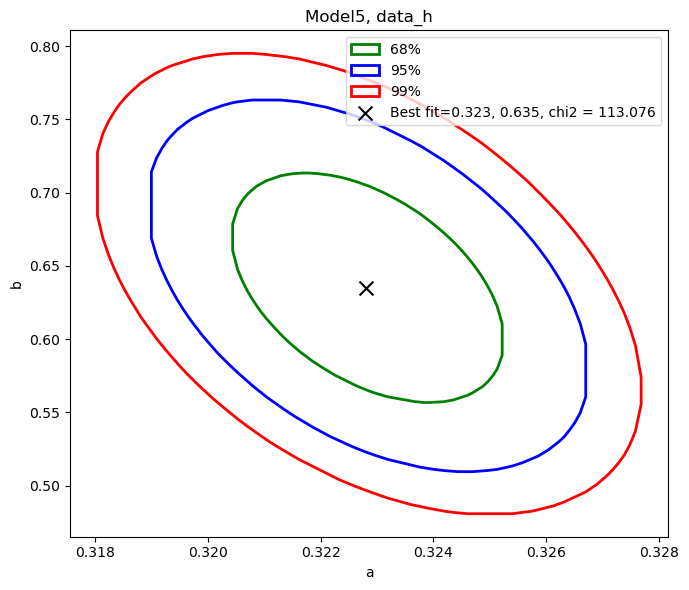

In [14]:
grid_A = make_grid(10, steps=500)/60
grid_B = make_grid(10, steps=500)/40
grid_C = make_grid(2, steps=200)/1e5
grid_tot = [grid_A, grid_B]
chi2_min, parms = plot_contour("best_fit_2.txt", "Model5", grid_tot, data_h, dataname='data_h', plot_parms='ab')

In [ ]:
def plot_graphs(*args):
    data_name, model_name = args
    data_f = np.loadtxt(os.path.join(os.getcwd(), 'Assignment5', 'regression_data_f.txt'))
    data_h = np.loadtxt(os.path.join(os.getcwd(), 'Assignment5', 'regression_data_h.txt'))
    data_j = np.loadtxt(os.path.join(os.getcwd(), 'Assignment5', 'regression_data_j.txt'))
    data_k = np.loadtxt(os.path.join(os.getcwd(), 'Assignment5', 'regression_data_k.txt'))
    data_names = ['data_f', 'data_h', 'data_j', 'data_k']
    data = [data_f, data_h, data_j, data_k]
    data_choice = data_names.index(data_name)
    x = data[data_choice][:,0]
    y = data[data_choice][:,1]
    cont_68 = np.load(f'./data/cont_{model_name}_{data_name}_0.npy')
    cont_95 = np.load(f'./data/cont_{model_name}_{data_name}_1.npy')
    cont_99 = np.load(f'./data/cont_{model_name}_{data_name}_2.npy')
        

In [33]:
np.load(f'./data/cont_Model3_data_h_0.npy').shape


(3, 469)

# 4.


New parameters: [0.1096921230720588, 9.132887270000001]
Min chi2: 1741.9618435402722


(1741.9618435402722, [0.1096921230720588, 9.132887270000001])

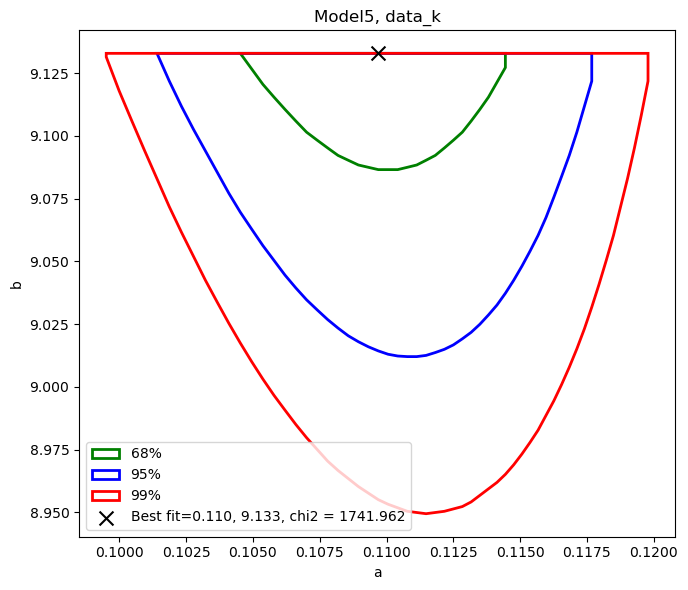

In [26]:
grid_A = make_grid(10, steps=200)/100
grid_B = make_grid(10, steps=200)/80
grid_C = make_grid(2, steps=200)/1e5
grid_tot = [grid_A, grid_B]
plot_contour("best_fit_4.txt", "Model5", grid_tot, data_k, data_name='data_k', plot_parms='ab')

In [40]:
chi2(M5, data_k[:,0], data_k[:,1], data_k[:,2], [0.10818543212065326, 9.24538727])

1736.6638123653267